# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import norm 
from scipy import stats 
df = pd.read_csv('data/human_body_temperature.csv')

In [228]:
# Your work here. Is the distribution of body temperatures normal?
# Is the sample size large? Are the observations independent? Yes, sample size > 30 and is considered large 
# and the observations are taken separately.
len(df)

130

In [229]:
len(df.temperature) 
# Observations can be considered independent as 130 is obviously less than 10% of the population at large. 
# A sample size of 130 is well over the the threshold of 30 (n>30) needed for the Central Limit Theorem to apply. 

130

In [230]:
df.columns

Index(['temperature', 'gender', 'heart_rate'], dtype='object')

In [231]:
type(df)

pandas.core.frame.DataFrame

In [232]:
df.describe

<bound method NDFrame.describe of      temperature gender  heart_rate
0           99.3      F        68.0
1           98.4      F        81.0
2           97.8      M        73.0
3           99.2      F        66.0
4           98.0      F        73.0
5           99.2      M        83.0
6           98.0      M        71.0
7           98.8      M        78.0
8           98.4      F        84.0
9           98.6      F        86.0
10          98.8      F        89.0
11          96.7      F        62.0
12          98.2      M        72.0
13          98.7      F        79.0
14          97.8      F        77.0
15          98.8      F        83.0
16          98.3      F        79.0
17          98.2      M        64.0
18          97.2      F        68.0
19          99.4      M        70.0
20          98.3      F        78.0
21          98.2      M        71.0
22          98.6      M        70.0
23          98.4      M        68.0
24          97.8      M        65.0
25          98.0      F       

In [233]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

In [234]:
n_bins = np.sqrt(len(df.temperature))  
int(n_bins)
temp = df.temperature

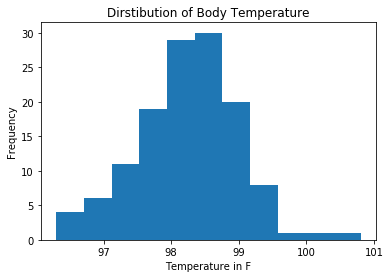

In [235]:
plt.hist(temp, bins = int(n_bins), density=False)  # density = True it gives you a normalized score 
plt.xlabel('Temperature in F')
plt.ylabel('Frequency')
plt.title('Dirstibution of Body Temperature')
#plt.axis([95, 105, 0, 1])
#x = np.linspace(np.min(temp) - 1, np.max(temp) + 1, 100, endpoint=True)
#x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
#plt.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
#npdf=norm(98.249231,0.733183)
#plt.plot( npdf.pdf(range(int(np.min(temp)) - 1,int(np.max(temp)) + 1)),  lw=2) #range(0,100),
plt.show()

# x = np.linspace(0,600) 
#h = plt.plot(x, rv.pdf(x), lw=2)

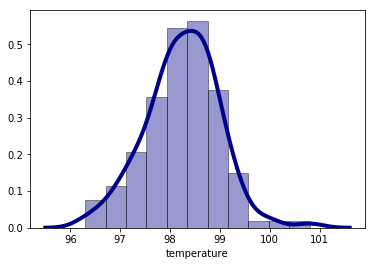

In [236]:
sns.distplot(temp, hist=True, kde=True, bins=int(n_bins), color = 'darkblue', hist_kws={'edgecolor':'black'}, 
             kde_kws={'linewidth': 4}) 

In [237]:
mu = np.mean(temp) 
sigma =np.std(temp)
print('The mean of the sample is: ' + str(mu))
print('The standard deviation of the sample is: '+ str(sigma))

The mean of the sample is: 98.24923076923078
The standard deviation of the sample is: 0.7303577789050377


In [238]:
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt


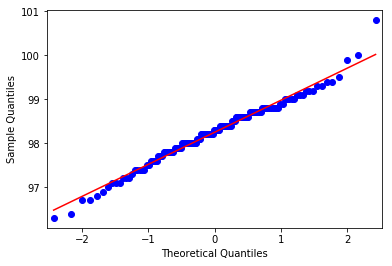

In [239]:
# to check if the data is normally distributed or not, we need to check the data against Q-Q plot as well as Cumulative density plot 
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
#from matplotlib import pyplot
import pylab
# seed the random number generator
seed(4)
# generate univariate observations
#data = 5 * randn(100) + 50
# q-q plot
#plt.title('Quantiles Confirming the Normal Distribution of Body Temperatures', fontsize=18)
qqplot(temp, line='s')
plt.show()

((array([-2.55445479, -2.22902648, -2.0419783 , -1.90719589, -1.80015121,
         -1.71047373, -1.63275826, -1.56381343, -1.50159038, -1.44469181,
         -1.39212017, -1.3431372 , -1.29718048, -1.2538112 , -1.21268003,
         -1.17350409, -1.13605091, -1.10012698, -1.06556939, -1.03223961,
         -1.00001877, -0.96880405, -0.93850586, -0.90904562, -0.88035396,
         -0.85236935, -0.82503685, -0.79830725, -0.77213622, -0.74648367,
         -0.72131321, -0.69659166, -0.67228871, -0.64837651, -0.62482945,
         -0.60162387, -0.57873784, -0.55615102, -0.53384444, -0.51180041,
         -0.49000234, -0.46843466, -0.44708273, -0.42593273, -0.40497157,
         -0.38418687, -0.36356684, -0.34310027, -0.32277642, -0.30258504,
         -0.28251629, -0.2625607 , -0.24270913, -0.22295275, -0.20328303,
         -0.18369165, -0.16417053, -0.14471177, -0.12530767, -0.10595063,
         -0.08663321, -0.06734807, -0.04808795, -0.02884566, -0.00961403,
          0.00961403,  0.02884566,  0.

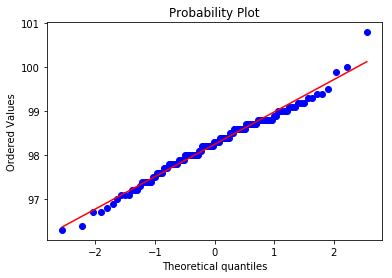

In [240]:
stats.probplot(temp, dist='norm', plot=pylab)

98.24923076923078
0.7303577789050377


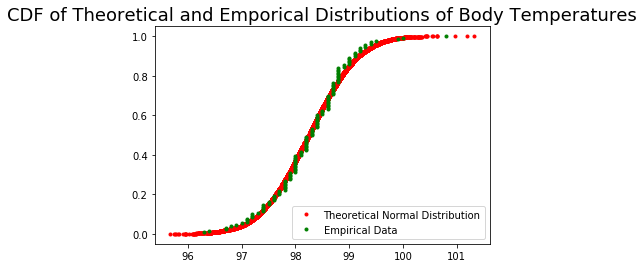

In [241]:
mean = np.mean(temp)
print(mean)
std = np.std(temp)
print(std)  
samples = np.random.normal(mean, std, size = 10000) 
ecdf_temp = ECDF(samples)
plt.plot(ecdf_temp.x,ecdf_temp.y, marker= '.', linestyle = 'none', color = 'r')
ecdf_data = ECDF(temp)
plt.plot(ecdf_data.x,ecdf_data.y, marker= '.', linestyle = 'none', color = 'g')
plt.legend(('Theoretical Normal Distribution', 'Empirical Data'), loc='lower right')
plt.title('CDF of Theoretical and Emporical Distributions of Body Temperatures', fontsize=18)
plt.show()

In [242]:
df.isnull().sum()

temperature    0
gender         0
heart_rate     0
dtype: int64

In [243]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [244]:
#Is the true population mean really 98.6 degrees F? 
#First, try a bootstrap hypothesis test. 
# H_0 : mean = 98.6
# H_a : mean != 98.6 
#Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why? 
# One Sample test since we are not  comparing the means of the treatment and control groups 
# and it's just one mean value that we are trying to veirfy the Hypothese about. 
# In other words, we are comparing one set of data to a single number and not comparing two sets of data
#In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?  t b/c the population mean is unknown
# The general rule of thumb for when to use a t score is when your sample: Has a sample size below 30, 
# Has an unknown population standard deviation so we use t statistic. 
#Now try using the other test. How is the result be different? Why? 

In [245]:
z_val=(mean-98.6)/(std/(len(temp)**0.5))
z_val

-5.475925202078116

In [246]:
# Probability that True Mean is within 5.45 std of 98.25 F
p_val = stats.norm.cdf(t_val)*2  # this means that the cumulative distribution of the being z-val is p_val
print('z-statistic has a z_val of: ' + str(z_val))
print('z-statistic has a p_val of: ' + str(p_val))

z-statistic has a z_val of: -5.475925202078116
z-statistic has a p_val of: 4.3523151658821886e-08


In [247]:
if p_val < 0.01: 
    print('We reject H_0 and the true population mean is not 98.6 F.')
else:
        print('Fail to reject H_0')
    

We reject H_0 and the true population mean is not 98.6 F.


In [248]:
print(stats.norm.sf(z_val))  #does this mean the area under the graph of the distribution under the mean is 0.9999???

0.9999999782384241


In [249]:
t_test = stats.ttest_1samp(temp, 98.6) #nan_policy='propagate' axis=0
print('The t-statistic is: ' + str(t_test[0]) + 'and the p-value is: ' +  str(t_test[1]) )

The t-statistic is: -5.4548232923645195and the p-value is: 2.4106320415561276e-07


In [250]:
#Try a bootstrap hypothesis test. #this is not bootstrap, is it? this is just a permutation of the sample I initially have had
np.random.seed(4)
bs_sample = np.random.choice(temp, size = 130)
bs_med = np.median(bs_sample)
bs_std = np.std(bs_sample)
bs_mean = np.mean(bs_sample)
print(bs_sample)
print(bs_med)
print(bs_std)
print(bs_mean)

[99.  98.7 97.6 98.  98.9 98.2 99.4 97.3 97.8 98.6 98.2 97.6 99.  97.9
 97.7 98.5 99.3 98.2 98.8 97.8 98.3 97.1 97.4 98.  98.5 97.7 99.2 99.
 98.  98.8 96.8 98.9 98.8 99.  98.6 98.8 98.4 98.8 99.  97.1 97.6 99.1
 97.6 98.6 98.3 98.4 98.  96.3 98.2 99.9 98.2 98.8 98.4 97.6 98.4 97.4
 98.6 96.3 98.6 99.  98.  98.2 98.4 98.6 98.2 98.2 98.7 99.1 98.6 98.2
 98.8 99.3 97.6 98.4 97.7 97.6 97.6 98.5 98.5 98.7 97.7 97.1 99.5 97.4
 98.6 98.4 99.  98.8 98.8 98.4 98.4 99.2 99.  98.8 98.  98.8 96.7 98.5
 98.  98.5 98.  98.3 99.2 99.  98.1 99.1 97.8 98.6 98.4 98.4 97.9 98.2
 97.6 98.2 98.2 98.4 97.1 98.  97.6 99.2 97.8 97.9 98.2 98.  99.5 97.9
 98.4 98.7 98.  97.8]
98.4
0.6498065255982429
98.29230769230769


In [251]:
def bootstrap_replicate_1d(temp, func):      # am I using this anywhere in this assignment at all?
     """Generate bootstrap replicate of 1D data."""   # this func gives the mean of a sample of temperaturs since we need
                                                      # a lot of the samles, the next chuck (with a for loop) makes it  
     bs_sample = np.random.choice(temp, len(temp))
     return func(bs_sample) 
bootstrap_replicate_1d(temp, np.mean) 

98.2623076923077

C:\Users\Nazanin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


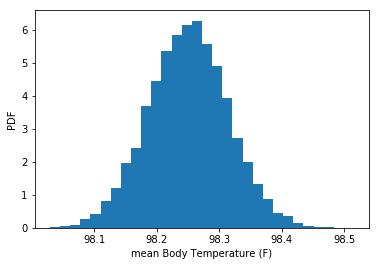

In [252]:
 bs_replicates = np.empty(10000)
for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(temp, np.mean)
                                                      #here, should I add return bs_replocates? 
                                                       # return is when you return a function 
plt.hist(bs_replicates, bins=30, normed=True)
plt.xlabel('mean Body Temperature (F)')
plt.ylabel('PDF')                                  # what are the axes? x is the mean of the 10000 samples, y axis? 
plt.show()

In [28]:
def draw_bs_reps(temp, func, size=1):     #don't know what is this one chunk is good for? Also, why size = 1(default argument)
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(temp, func)  #or np.mean instead of func?

    return bs_replicates


In [253]:
p_value_bs = np.sum(bs_replicates >= 98.6)/10000
print('The p_value of the bootstrap method is: ' + str(p_value_bs))
conf_int = np.percentile(bs_replicates, [0.5, 99.5]) 
print(conf_int)    # 98.6 is not in the 99% confidence interval so the p-value is much less than the alphs of 0.01 and we can
                   # reject the Null Hypothosis
if p_value_bs < 0.01: 
    print('We reject H_0 and the true population mean is not 98.6 F.')
else:
        print('Fail to reject H_0')    
    

The p_value of the bootstrap method is: 0.0
[98.08538077 98.41461923]
We reject H_0 and the true population mean is not 98.6 F.


0.06405661469519336
0.06380863626134425


C:\Users\Nazanin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


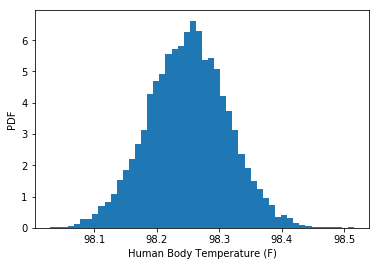

In [167]:
#bs_replicates = 

# Compute and print SEM
sem = np.std(temp) / np.sqrt(len(temp))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
plt.hist(bs_replicates, bins=50, normed=True)
plt.xlabel('Human Body Temperature (F)')
plt.ylabel('PDF')

# Show the plot
plt.show()

In [254]:
conf_int = np.percentile(bs_replicates, [0.5, 99.5]) 
print(conf_int)

[98.08538077 98.41461923]


In [255]:
#Draw a small sample of size 10 from the data and repeat both frequentist tests.
#Which one is the correct one to use?
#What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?

In [256]:
np.random.seed(44)     # t statistic does not have enough evidence to reject the H_0
temp_ssample = np.random.choice(temp, size = 10)
print(temp_ssample)
# t-statistic 
t_stest = stats.ttest_1samp(temp_ssample, 98.6) #nan_policy='propagate' axis=0
print('The t-statistic is: ' + str(t_stest[0]) + 'and the p-value is: ' +  str(t_stest[1]) )

[98.3 97.6 99.9 98.6 97.7 98.6 98.6 97.3 99.  98.2]
The t-statistic is: -0.9227385558939308and the p-value is: 0.3802157952307399


In [257]:
# z-statistic 
z_sval=(np.mean(temp_ssample)-98.6)/(np.std(temp_ssample)/(len(temp_ssample)**0.5))
z_sval
# Probability that True Mean is within 5.45 std of 98.25 F
p_sval = stats.norm.cdf(z_sval)*2    # should it be multiplied 2? yes, since it's 2 tailed 
#p_sval = stats.norm.cdf(z_sval)  # this means that the cumulative distribution of the being 5.48 std is p_val
print('z-statistic has a z_val of: ' + str(z_sval))
print('z-statistic has a p_val of: ' + str(p_sval))

z-statistic has a z_val of: -0.9726518404931364
z-statistic has a p_val of: 0.3307263683089995


In [258]:
if p_sval < 0.01: 
    print('We reject H_0 and the true population mean is not 98.6 F.')
else:
        print('Fail to reject H_0')      # WEIRD RESULT for both t and z statistic!!!!
    

Fail to reject H_0


In [259]:
#At what temperature should we consider someone's temperature to be "abnormal"?
#As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
#Start by computing the margin of error and confidence interval. When calculating the confidence interval, 
#keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [260]:
#moe = z_val * (std/np.sqrt(130))
#print(moe)

In [261]:
#The 95% confidence interval for a single draw (n=1) from a normal distribution with mean mu and std deviation: 
confidence_int = stats.norm.interval(0.95, loc=mean, scale=std)  # is this correct? a student got it and others got other answers
#conf_int = np.percentile(bs_replicates, [0.5, 99.5]) 
# I used n = 1 here since it's individual stats rather than / np.sqrt(len(temp))
print(confidence_int)

(96.81775582674824, 99.68070571171332)


In [262]:
z_crit = 1.96 * std
ci = np.array([mean + z_crit,  mean - z_crit])
print('The critical z-value is: '+ str(z_crit))
print('The 95% confidence interval is between: '+ str(ci) + ' so a body temperature outside of the confidence interval is considered abnormal.')

The critical z-value is: 1.431501246653874
The 95% confidence interval is between: [99.68073202 96.81772952] so a body temperature outside of the confidence interval is considered abnormal.


In [263]:
#Try a bootstrap hypothesis test.  
#np.random.seed(444)
bs_replicates_abn = np.empty(10000)
for i in range(10000):
    bs_replicates_abn[i] = bootstrap_replicate_1d(temp, np.mean)
                                    

p_value_bs = np.sum(bs_replicates_abn >= 98.6)/10000
bs_confident_int_abn = stats.norm.interval(0.95, loc=mean, scale=std) #np.percentile(bs_replicates_abn, [2.5,97.5])
                                                                     #how come if I do above the CI are so different??!!!
#bs = draw_bs_reps(temp, np.mean, size=10000)
print('The p_value through the bootstrap method is: ' + str(p_value_bs))  
print('The 95% confidence interval through the bootstrap method is: ' + str(bs_confident_int_abn))

The p_value through the bootstrap method is: 0.0
The 95% confidence interval through the bootstrap method is: (96.81775582674824, 99.68070571171332)


In [264]:
#Is there a significant difference between males and females in normal temperature?
#What testing approach did you use and why? Null Hypo  --> H_0: D = 0 (D = difference between mean temp of male and female)
                                                          # H_a : D != 0. 
#Write a story with your conclusion in the context of the original problem.
df.head()       

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [265]:
mean_f = np.mean(df[df['gender'] == 'F'].temperature)
std_f = np.std(df[df['gender'] == 'F'].temperature)
print('The mean for female body temperature is: ' + str(mean_f))
print('The standard deviation for female body temperature is: ' + str(std_f))

The mean for female body temperature is: 98.39384615384613
The standard deviation for female body temperature is: 0.7377464486428966


In [266]:
mean_m = np.mean(df[df['gender'] == 'M'].temperature)
std_m = np.std(df[df['gender'] == 'M'].temperature)
print('The mean for male body temperature is: ' + str(mean_m))
print('The standard deviation for male body temperature is: ' + str(std_m))

The mean for male body temperature is: 98.1046153846154
The standard deviation for male body temperature is: 0.6933598841828696


In [313]:
mean_d = mean_f - mean_m
std_d = np.sqrt(std_m **2 /65+ std_f ** 2/65)  #this is the std of both std's of male and female, correct???
print('The mean difference bwteen female and male body temperature is: ' + str(mean_d))
print('The standard deviation of difference bewteen female and male body temperature is: ' + str(std_d))

The mean difference bwteen female and male body temperature is: 0.289230769230727
The standard deviation of difference bewteen female and male body temperature is: 0.12557668521231213


In [268]:
df.groupby('gender').size()

gender
F    65
M    65
dtype: int64

In [269]:
f_temp = df[df['gender'] == 'F']['temperature']
print(f_temp.head())

0    99.3
1    98.4
3    99.2
4    98.0
8    98.4
Name: temperature, dtype: float64


In [270]:
m_temp = df[df['gender'] == 'M']['temperature']
print(m_temp.head())

2     97.8
5     99.2
6     98.0
7     98.8
12    98.2
Name: temperature, dtype: float64


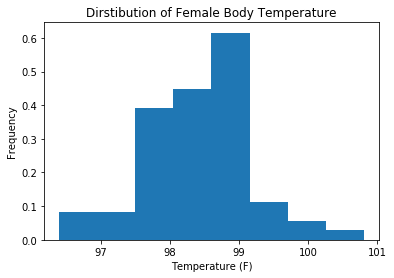

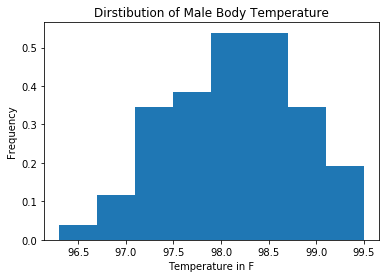

In [271]:
n_bins_f = np.sqrt(65)  
int(n_bins_f)
plt.subplots(1,1)
plt.hist(f_temp, bins = int(n_bins_f), density=True)  
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.title('Dirstibution of Female Body Temperature')
#plt.axis([95, 105, 0, 1])
#x = np.linspace(np.min(f_temp) - 1, np.max(f_temp) + 1, 50, endpoint=True)
#x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
#plt.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
#npdf=norm(98.249231,0.733183)
#plt.plot( npdf.pdf(range(int(np.min(temp)) - 1,int(np.max(temp)) + 1)),  lw=2) #range(0,100),
plt.subplots(1,0)
plt.hist(m_temp, bins = int(n_bins_f), density=True)  
plt.xlabel('Temperature in F')
plt.ylabel('Frequency')
plt.title('Dirstibution of Male Body Temperature')
#plt.axis([95, 105, 0, 1])
#x = np.linspace(np.min(m_temp) - 1, np.max(m_temp) + 1, 50, endpoint=True)
plt.show()

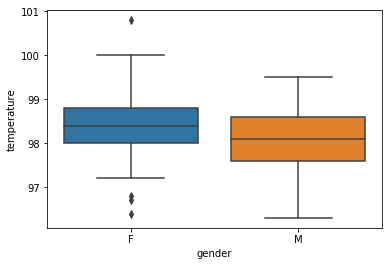

In [272]:
sns.boxplot(x = 'gender', y = 'temperature', data=df)

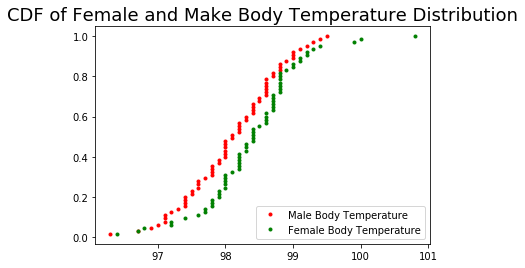

In [273]:
#samples = np.random.normal(mean, std, size = 10000) #what does it mean when we put mean and std in the 1st and 2nd arguments
ecdf_temp_m = ECDF(m_temp)
plt.plot(ecdf_temp_m.x,ecdf_temp_m.y, marker= '.', linestyle = 'none', color = 'r')
ecdf_temp_f = ECDF(f_temp)
plt.plot(ecdf_temp_f.x,ecdf_temp_f.y, marker= '.', linestyle = 'none', color = 'g')
#temp_norm = np.random.normal(np.mean(temp), np.std(temp), 100000)
#ecdf = ECDF(temp_norm)
#ecdf = ECDF(data)
#plt.plot(ecdf.x,ecdf.y)
plt.legend(('Male Body Temperature', 'Female Body Temperature'), loc='lower right')
plt.title('CDF of Female and Make Body Temperature Distribution', fontsize=18)
plt.show()

In [274]:
#t test 

In [314]:
z_val_d=(mean_d- 0)/(std_d)
print(z_val_d)      # t score b/c we did a t test but then how about the next cell for the t-test???

2.3032202891940123


In [292]:
np.random.seed(44)     
temp_fsample = np.random.choice(f_temp, 65)
print(temp_fsample)
# t-statistic 
t_ftest = stats.ttest_1samp(temp_fsample, 98.39) #nan_policy='propagate' axis=0 98.39 is pop mean for female temp 
print('The t-statistic is: ' + str(t_ftest[0]) + 'and the p-value is: ' +  str(t_ftest[1]) )

[ 96.4  98.7  96.8  97.7  98.   98.   97.9  99.1  99.   97.8  98.4  98.
  98.1  98.1  99.1  97.6  99.   98.2  98.7  99.4  97.6  98.8  98.4  98.2
  97.2  99.2  96.8 100.8  98.   98.7  98.1  97.4  98.8  98.   98.8  98.4
  98.2  99.4  97.7  97.8  99.   99.2  97.2  98.3  98.4  99.3  98.6  98.4
  99.1  98.   99.   98.3  99.4  98.2  98.4  98.3  99.2  99.   99.2  98.1
  98.9  98.3  98.6  98.2  97.9]
The t-statistic is: -0.09291803301356745and the p-value is: 0.9262589402186184


In [293]:
np.random.seed(40)     
temp_msample = np.random.choice(m_temp, 65)
print(temp_msample)
# t-statistic 
t_mtest = stats.ttest_1samp(temp_msample, 98.1) #nan_policy='propagate' axis=0 98.1 is pop mean for male temp 
print('The t-statistic is: ' + str(t_mtest[0]) + 'and the p-value is: ' +  str(t_mtest[1]) )

[98.2 98.8 98.6 98.  98.3 98.4 97.4 97.  98.  97.8 97.6 98.6 98.5 98.6
 98.6 99.  97.4 98.8 97.  97.6 98.5 98.8 98.  98.6 98.7 98.  98.1 97.1
 98.8 97.4 98.2 98.2 98.  97.1 99.  97.3 97.3 99.  97.7 97.8 99.2 98.9
 98.5 97.3 98.  98.6 98.6 98.3 98.2 97.8 97.2 98.6 99.  98.  96.9 98.
 97.  97.8 97.1 98.4 98.7 98.2 97.8 97.5 98.4]
The t-statistic is: -0.140436911793233and the p-value is: 0.8887558614983592


In [297]:
 bs_replicates_f = np.empty(10000)
for i in range(10000):
    bs_replicates_f[i] = bootstrap_replicate_1d(f_temp, np.mean)
                   

In [319]:
p_value_f = np.sum(bs_replicates_f>= 98.6)/10000   # not sure what to have for >= inside the sum()  ?????
bs_confident_f = stats.norm.interval(0.95, loc=mean_f, scale=std_f)
z_critical_f = stats.norm.ppf(q = 0.95)
print('Female Body Temperature p-value is: ' + str(p_value_f))
print('Female Body Temperature 95% confidence interval is: ' + str(bs_confident_f))
print(z_critical_f)

Female Body Temperature p-value is: 0.0147
Female Body Temperature 95% confidence interval is: (96.94788968478372, 99.83980262290854)
1.6448536269514722


In [311]:
moe_f = z_critical_f * (std_f/np.sqrt(65))
print(moe_f)

0.15051428020605384


In [318]:
 bs_replicates_m = np.empty(10000)
for i in range(10000):
    bs_replicates_m[i] = bootstrap_replicate_1d(m_temp, np.mean)
p_value_m = np.sum(bs_replicates_m >= 98.6)/10000
bs_confident_m = stats.norm.interval(0.95, loc=mean_m, scale=std_m)
z_critical_m = stats.norm.ppf(q = 0.95)
print('Male Body Temperature p-value is: ' + str(p_value_m))
print('Male Body Temperature 95% confidence interval is: ' + str(bs_confident_m))
print(z_critical_m)

Male Body Temperature p-value is: 0.0
Male Body Temperature 95% confidence interval is: (96.74565498329211, 99.46357578593869)
1.6448536269514722


In [312]:
moe_m = z_critical_m * (std_m/np.sqrt(65))
print(moe_m)

0.14145857846352414


In [322]:
result = stats.ttest_ind(f_temp, m_temp, equal_var=False)   # for 2 independent samples 
print(result)

Ttest_indResult(statistic=2.285434538165611, pvalue=0.023938264182934196)


In [324]:
result_bs = stats.ttest_ind(bs_replicates_f, bs_replicates_m, equal_var=True)
print(result_bs)

Ttest_indResult(statistic=230.3305157165124, pvalue=0.0)


In [306]:
#margin of error for female body temp:    # is this correct in any way?????
z_f=(np.mean(f_temp)-98.39)
#z_f = (mean_f -)/(std_f/np.sqrt(65))
print(z_f)

0.003846153846126299


In [217]:
# stats.t.sf(z_val_d, 130-2)   # p-value  Should I use this?! 

0.011439639934792151

In [295]:
p_val_d = stats.norm.cdf(z_val_d)*2 # this means that the cumulative distribution of the being 5.48 std is p_val 
print('z-statistic has a z_value of: ' + str(z_val_d)) 
print('z-statistic has a p_value of: ' + str(p_val_d))

z-statistic has a z_value of: 2.3032202891940123
z-statistic has a p_value of: 1.9787335481698707
